<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27555 non-null  float64
 6   market_price  27555 non-null  float64
 7   type          27555 non-null  object 
 8   rating        18929 non-null  float64
 9   description   27440 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 2.1+ MB
None
             index    sale_price  market_price        rating
count  27555.00000  27555.000000  27555.000000  18929.000000
mean   13778.00000    322.514808    382.056664      3.943410
std     7954.58767    486.263116    581.730717      0.739063
min        1.00000      2.450000      3.000000      1.000000
25%

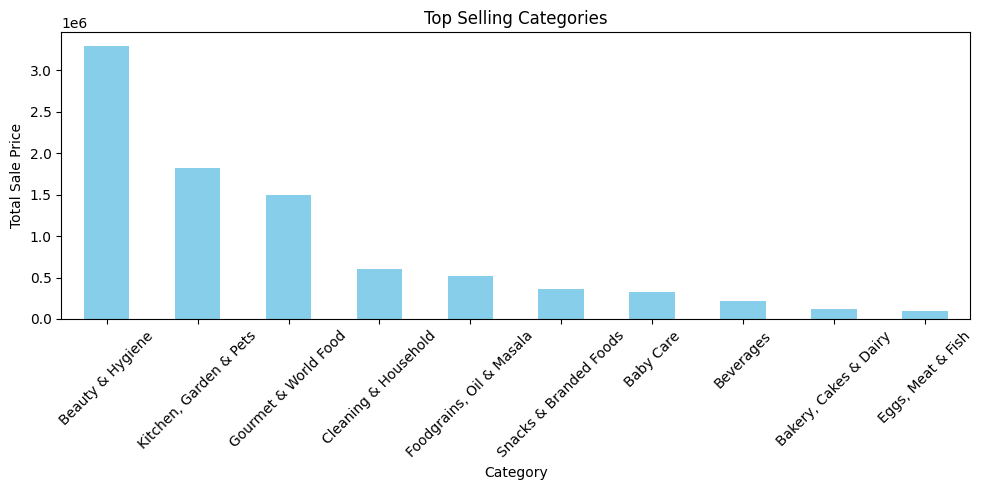

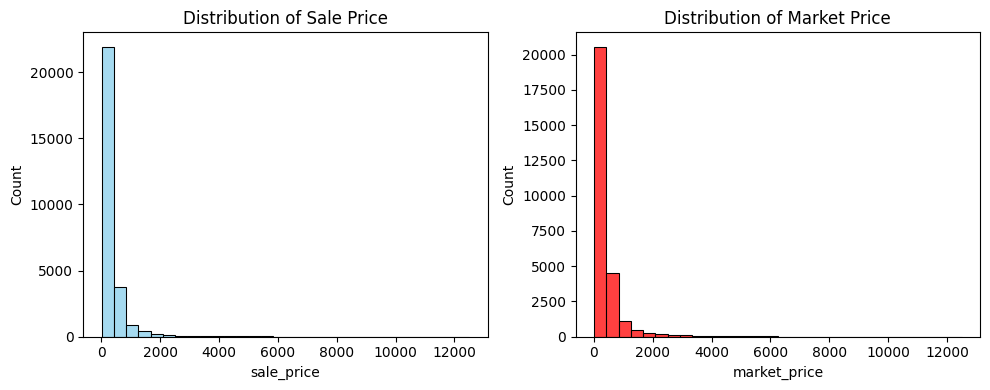

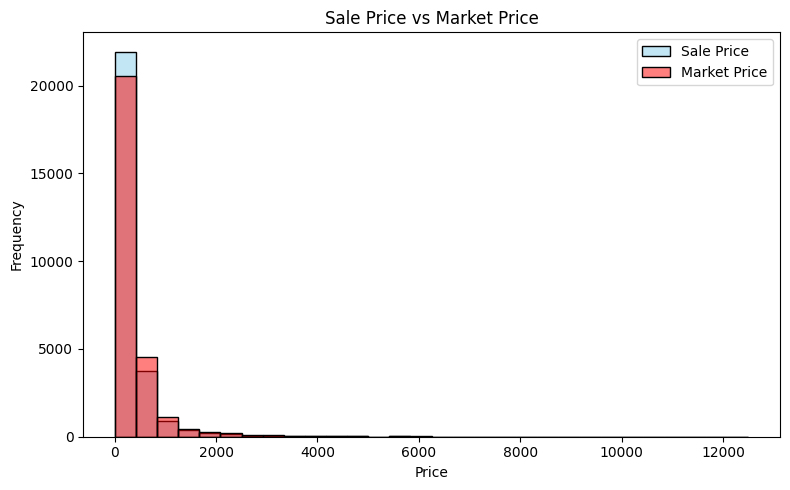


Correlation Matrix:
              sale_price  market_price    rating
sale_price      1.000000      0.965198 -0.079285
market_price    0.965198      1.000000 -0.094989
rating         -0.079285     -0.094989  1.000000


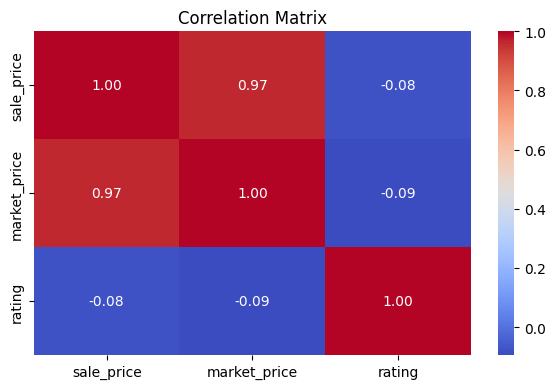


Top 10 Brands by Frequency:
brand
Fresho              638
bb Royal            539
BB Home             428
DP                  250
Fresho Signature    171
bb Combo            168
Amul                153
INATUR              146
Himalaya            141
Dabur               138
Name: count, dtype: int64


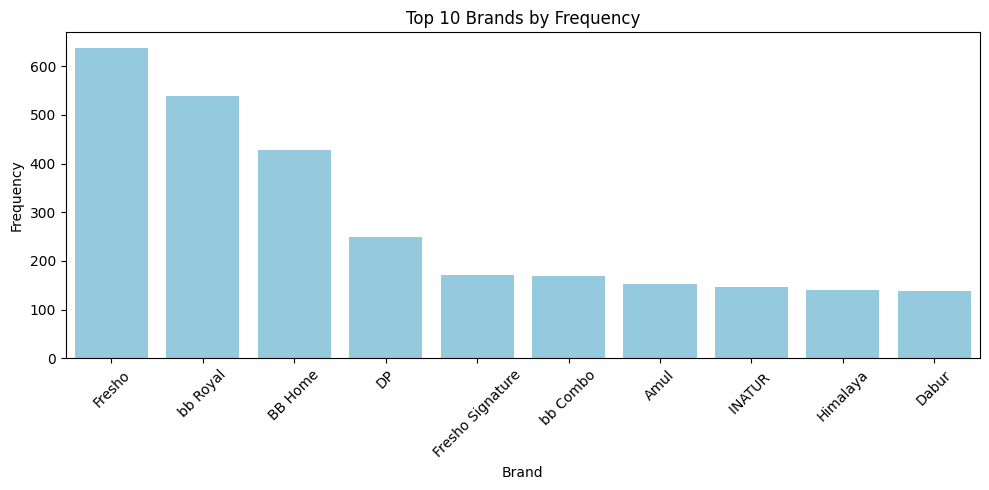


Average Rating of Top Brands:
brand
Fresho Signature    4.211111
DP                  4.200000
Himalaya            4.141007
Dabur               4.108000
BB Home             4.106936
bb Royal            4.047122
Amul                4.041830
Fresho              4.033333
bb Combo            4.025000
INATUR              3.810989
Name: rating, dtype: float64


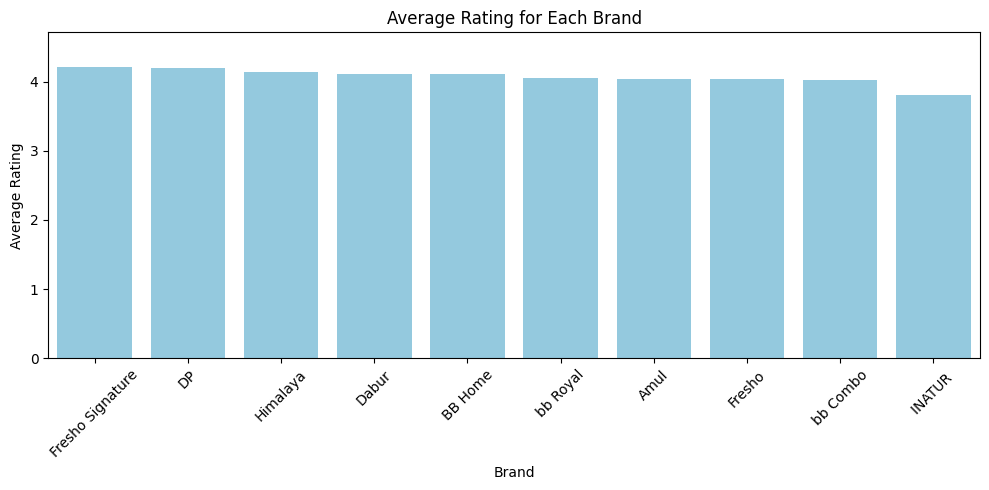

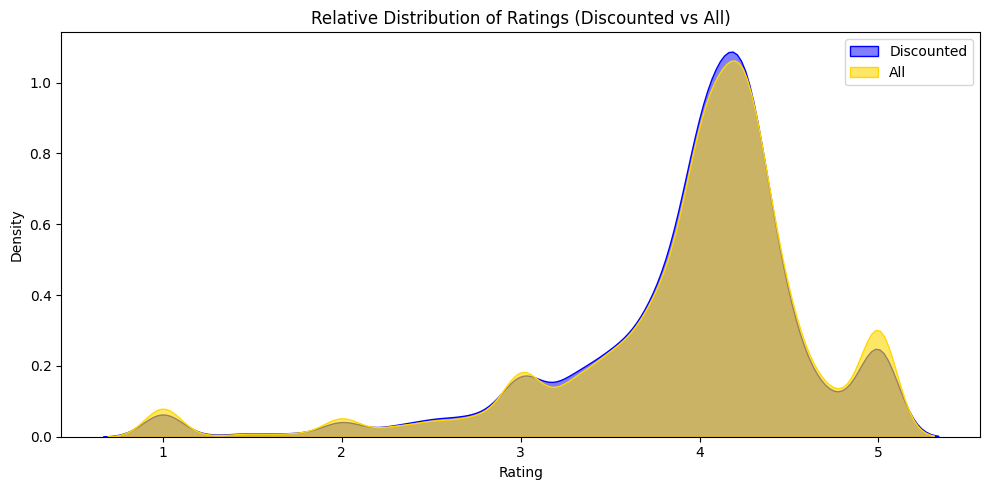

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "C:\\For saving something\\BigBasket Products.csv"
data = pd.read_csv(file_path)

# View structure and summary
print(data.info())
print(data.describe())

# -------------------------------------------------------
# 1. Top Selling Categories
# -------------------------------------------------------
category_sales = data.groupby("category")["sale_price"].sum().sort_values(ascending=False)
top_categories = category_sales.head(10)

# Bar plot for top-selling categories
plt.figure(figsize=(10, 5))
top_categories.plot(kind='bar', color='skyblue')
plt.title("Top Selling Categories")
plt.xlabel("Category")
plt.ylabel("Total Sale Price")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 2. Distribution of Sale Price and Market Price
# -------------------------------------------------------

# Separate histograms
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(data["sale_price"], bins=30, color='skyblue')
plt.title("Distribution of Sale Price")

plt.subplot(1, 2, 2)
sns.histplot(data["market_price"], bins=30, color='red')
plt.title("Distribution of Market Price")
plt.tight_layout()
plt.show()

# Overlayed histogram
plt.figure(figsize=(8, 5))
sns.histplot(data["sale_price"], bins=30, color='skyblue', label='Sale Price', alpha=0.5)
sns.histplot(data["market_price"], bins=30, color='red', label='Market Price', alpha=0.5)
plt.title("Sale Price vs Market Price")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 3. Correlation Matrix
# -------------------------------------------------------
# Compute correlation between numeric columns
correlation_matrix = data[["sale_price", "market_price", "rating"]].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

# Heatmap for visualizing correlation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 4. Top 10 Brands by Frequency
# -------------------------------------------------------
brand_frequency = data['brand'].value_counts().head(10)
print("\nTop 10 Brands by Frequency:")
print(brand_frequency)

# Bar plot for top brands
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_frequency.index, y=brand_frequency.values, color='skyblue')
plt.title("Top 10 Brands by Frequency")
plt.xlabel("Brand")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 5. Average Rating for Top Brands
# -------------------------------------------------------
top_brands = brand_frequency.index.tolist()

# Calculate average rating
brand_avg_rating = (
    data[data['brand'].isin(top_brands)]
    .groupby("brand")["rating"]
    .mean()
    .sort_values(ascending=False)
)

print("\nAverage Rating of Top Brands:")
print(brand_avg_rating)

# Plot average rating
plt.figure(figsize=(10, 5))
sns.barplot(x=brand_avg_rating.index, y=brand_avg_rating.values, color='skyblue')
plt.title("Average Rating for Each Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.ylim(0, brand_avg_rating.max() + 0.5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------------------------------
# 6. Ratings Distribution - Discounted vs All Products
# -------------------------------------------------------
# Create price difference column
data["diff_in_prices"] = data["market_price"] - data["sale_price"]
discounted = data[data["diff_in_prices"] != 0]

# Density plot
plt.figure(figsize=(10, 5))
sns.kdeplot(discounted["rating"], fill=True, label="Discounted", color='blue', alpha=0.5)
sns.kdeplot(data["rating"], fill=True, label="All", color='gold', alpha=0.6)
plt.title("Relative Distribution of Ratings (Discounted vs All)")
plt.xlabel("Rating")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from yellowbrick.cluster import KElbowVisualizer
from sklearn.decomposition import PCA

# Load dataset
file_path = "C:\\For saving something\\BigBasket Data.csv"
data = pd.read_csv(file_path)

# Select and clean relevant columns
data = data[['Sales_price', 'Market_price', 'Rating']].dropna()

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Dendrogram (Hierarchical clustering)
linked = linkage(scaled_data, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title('Dendrogram of Hierarchical Clustering')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

# KMeans clustering with 3 clusters
kmeans = KMeans(n_clusters=3, n_init=25, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
data['Cluster'] = clusters

# Visualize clusters using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=data['Cluster'], palette='Set1')
plt.title('KMeans Clustering (Visualized with PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

# Elbow method
model = KMeans(n_init=25, random_state=42)
visualizer = KElbowVisualizer(model, k=(1, 10), metric='distortion', timings=False)
visualizer.fit(scaled_data)
visualizer.show()

# Silhouette method
visualizer = KElbowVisualizer(model, k=(2, 10), metric='silhouette', timings=False)
visualizer.fit(scaled_data)
visualizer.show()



In [ ]:
import pandas as pd
from apyori import apriori
from collections import Counter
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Display category frequency
category_counts = data['Category'].value_counts()
print("\nCategory Frequency Distribution:")
print(category_counts.head(20))

# Use top 12 categories for better co-occurrence
top_categories = category_counts.head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Generate transactions (keep those with >= 4 unique categories)
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # Remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Show first few transactions
print(f"\nExample transactions (first 3): {transactions[:3]}")

# Generate association rules using Apriori
rules = apriori(
    transactions,
    min_support=0.0025,   # Lower support to capture more patterns
    min_confidence=0.6,   # Acceptable confidence threshold
    min_lift=1.0          # Keep all, will filter later
)

# Extract rule components
results = []
for rule in rules:
    for stat in rule.ordered_statistics:
        base, add = tuple(stat.items_base), tuple(stat.items_add)
        if base and add:
            results.append((base, add, rule.support, stat.confidence, stat.lift))

# Create DataFrame from rules
if len(results) == 0:
    print("\n❌ No rules generated.")
    exit()

rules_df = pd.DataFrame(results, columns=["Antecedent", "Consequent", "Support", "Confidence", "Lift"])
print("\n🔝 All Extracted Rules:\n", rules_df.sort_values(by='Lift', ascending=False).head(5))

# --- 🔍 Filter Strong Rules for Accuracy Check ---
filtered_rules_df = rules_df[
    (rules_df['Confidence'] >= 0.75) & 
    (rules_df['Lift'] >= 1.1)
]

print(f"\n✅ Filtered Strong Rules: {len(filtered_rules_df)} retained from {len(rules_df)}")

# Save top rules
filtered_rules_df.to_csv("filtered_high_accuracy_ruless.csv", index=False)
print("\n📄 Top Rules Saved as 'filtered_high_accuracy_rules.csv'")

# --- ✅ Accuracy Calculation ---
correct = 0
total = 0

for _, row in filtered_rules_df.iterrows():
    ant = set(row['Antecedent'])
    con = set(row['Consequent'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

mba_accuracy = round((correct / total) * 100, 2) if total else 0
print("\n🎯 MBA Rule Accuracy (Filtered):", mba_accuracy, "%")

# --- 📊 Visualize Top Items ---
item_counts = Counter([item for trx in transactions for item in trx])
top_items = item_counts.most_common(15)
items, counts = zip(*top_items)

plt.figure(figsize=(10, 6))
plt.bar(items, counts, color='orange')
plt.xticks(rotation=90)
plt.title("Top 15 Frequent Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from collections import Counter
import time

# Timer Start
start = time.time()

# Load dataset
data = pd.read_csv("C:\\For saving something\\BigBasket Data.csv")
data['Invoice No.'] = data['Invoice No.'].astype(str)
data['Category'] = data['Category'].astype(str).str.strip().str.lower()

# Use top categories for frequent co-purchase
top_categories = data['Category'].value_counts().head(12).index.tolist()
filtered_data = data[data['Category'].isin(top_categories)]

# Build transactions
transactions = (
    filtered_data.groupby('Invoice No.')['Category']
    .apply(lambda x: list(set(x)))  # remove duplicates
    .tolist()
)
transactions = [t for t in transactions if len(t) >= 4]

# Encode transactions
te = TransactionEncoder()
df = pd.DataFrame(te.fit(transactions).transform(transactions), columns=te.columns_)

# Apply FP-Growth
frequent_items = fpgrowth(df, min_support=0.003, use_colnames=True)

# Automatically extract rules with good metrics
rules = association_rules(frequent_items, metric="lift", min_threshold=1.1)

# Keep rules with confidence ≥ 0.75 (strong, no extra filter step later)
strong_rules = rules[rules['confidence'] >= 0.75]
strong_rules = strong_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']]
strong_rules.reset_index(drop=True, inplace=True)

# Accuracy Evaluation
correct = 0
total = 0
for _, row in strong_rules.iterrows():
    ant = set(row['antecedents'])
    con = set(row['consequents'])
    for trx in transactions:
        trx_set = set(trx)
        if ant.issubset(trx_set):
            total += 1
            if con.issubset(trx_set):
                correct += 1

accuracy = round((correct / total) * 100, 2) if total else 0

# Display Results
print("✅ Total Rules:", len(strong_rules))
print("🎯 Accuracy (FP-Growth, strong rules):", accuracy, "%")
print("⏱️ Time taken: {:.2f} seconds".format(time.time() - start))
print("\n🔝 Top 5 Rules:\n", strong_rules.sort_values(by='lift', ascending=False).head())

# Optional: Save to CSV
strong_rules.to_csv("fp_growth_optimized_rules.csv", index=False)


In [ ]:
from flask import Flask, render_template, request
import pickle
import ast
import pandas as pd

app = Flask(__name__)

# Load the model
with open("mba_filtered_rules_model.pkl", "rb") as f:
    rules_df = pickle.load(f)

# Normalize function
def normalize(item):
    return item.lower().strip()

# Normalize antecedents and consequents as sets
def ensure_set(column):
    new_col = []
    for value in column:
        if isinstance(value, str):
            items = ast.literal_eval(value)
        else:
            items = value
        new_col.append(set(map(normalize, items)))
    return new_col

rules_df["Antecedent"] = ensure_set(rules_df["Antecedent"])
rules_df["Consequent"] = ensure_set(rules_df["Consequent"])

# Get all unique items for dropdown
all_items = set()
for _, row in rules_df.iterrows():
    all_items.update(row["Antecedent"])
    all_items.update(row["Consequent"])

available_categories = sorted([item.title() for item in all_items])

@app.route("/")
def home():
    return render_template("index.html", available_categories=available_categories)

@app.route("/suggestions", methods=["POST"])
def suggestions():
    input_items = request.form.get("items", "").strip().lower()
    
    # Use semicolon as delimiter to allow comma inside item names
    input_list = set(item.strip() for item in input_items.split(";") if item.strip())

    print("Processed Input items:", input_list)

    suggestions = set()
    for _, row in rules_df.iterrows():
        if input_list & row["Antecedent"]:
            suggestions.update(row["Consequent"])

    if suggestions:
        return render_template("index.html",
                               suggestions=[s.title() for s in suggestions],
                               available_categories=available_categories)
    else:
        return render_template("index.html",
                               message="No suggestions found.",
                               available_categories=available_categories)

if __name__ == "__main__":
    app.run(debug=True)
